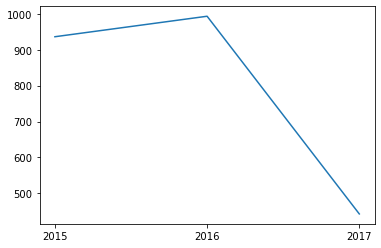

2015 936
2016 993
2017 443


In [1]:
# QUESTION 1

# importing libraries
import matplotlib.pyplot as plt
import pandas as pd

# reading data set
data=pd.read_csv('startup_funding.csv')

data.iloc[2103] = '12/05/2015'
data.iloc[2104] = '12/05/2015'
data.iloc[2159] = '13/04/2015'
data.iloc[2339] = '15/01/2015'
data.iloc[2357] = '22/01/2015'

year=data['Date'].str.split('/',expand=True)
year=year[2].value_counts(ascending=True)

a=year.index.sort_values(ascending=True, return_indexer=True)
year=year[a[1]]
x=year.index
y=year
plt.plot(x,y)
plt.show()

for i in range(len(year)):
    print(year.index[i],year[i])


Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


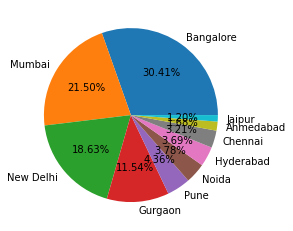

In [3]:
# QUESTION 2

import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('startup_funding.csv')

data['CityLocation'].dropna(inplace=True)
a=data['CityLocation'].str.split('/',expand=True)
a[0]=a[0].str.strip()

# index1=a[a[0]=='bangalore'].index
# a.iloc[index1]='Bangalore'
# index2=a[a[0]=='Delhi'].index
# a.iloc[index2]='New Delhi'

a[0].replace('bangalore','Bangalore',inplace=True)
a[0].replace('Delhi','New Delhi',inplace=True)
city=a[0].value_counts(ascending=False)

x=[]
y=[]
for i in range(10):
    x.append(city[i])
    y.append(city.index[i])
    print(city.index[i],city[i])
    
plt.pie(x,labels=y,autopct='%.2f%%')
plt.show()

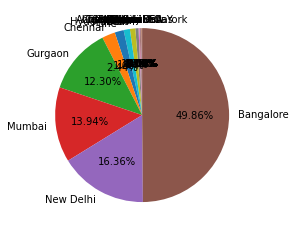

Bangalore 49.86
New Delhi 16.36
Mumbai 13.94
Gurgaon 12.30
Chennai 2.44
Pune 1.68
Hyderabad 1.16
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [5]:
# QUESTION 3

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv('startup_funding.csv')

data.dropna(subset=['CityLocation'],inplace=True)
data.dropna(subset=['AmountInUSD'],inplace=True)
data['CityLocation'].replace('Delhi','New Delhi',inplace=True)
data['CityLocation'].replace('bangalore','Bangalore',inplace=True)
a=data['CityLocation'].str.split('/',expand=True)
b=a[0].str.strip()
cities=b.unique()

# function to remove all commas from the AmountInUSD column in dataframe
def amt(string):
    if "," in string:
        p=string.replace(",","")
        p=int(p)
        return p
    else:
        return 0

fund=data["AmountInUSD"].apply(amt)

city=[]
funding=[]

for ele in cities:
    city.append(ele)
    bool_alg=data.CityLocation==ele
    amount=fund[bool_alg].sum()
    funding.append(amount)

index=np.argsort(funding)
city=np.array(city)
funding=np.array(funding)
city=city[index]
funding=funding[index]

# plotting the pie chart
plt.pie(funding,labels=city,autopct='%.2f%%',startangle=90)
plt.show()

# sorting the numpy array
index=np.argsort(funding)
city=city[index]
s=funding.sum()

for i in range(len(city)-1,len(city)-11,-1):
    
    # top 10 cities with most amount of funding 
    # printing the city and percentage with 2 decimal place after rounding off.
    print(city[i],format((funding[i]/s)*100,'.2f'))


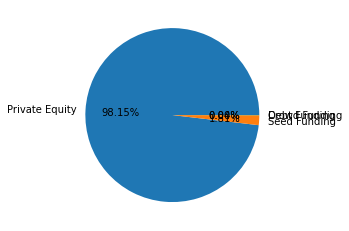

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [6]:
# QUESTION 4

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv('startup_funding.csv')

data.dropna(subset=['InvestmentType'],inplace=True)
data.dropna(subset=['AmountInUSD'],inplace=True)
data['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
data['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
data['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)


def amt(str):
    if ',' in str:
        p=str.replace(',','')
        p=int(p)
        return p
    else:
        return 0

amount=data['AmountInUSD'].apply(amt)

x=[]
y=[]
for ele in data['InvestmentType'].unique():
    x.append(ele)
    bool_arr=data['InvestmentType']==ele
    y.append(amount[bool_arr].sum())

plt.pie(y,labels=x,autopct='%.2f%%')
plt.show()

s=np.sum(y)
for i in range(len(x)):
    print(x[i],format((y[i]/s)*100,'.2f'))



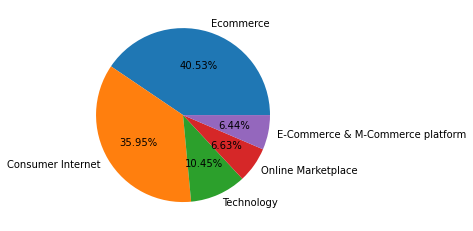

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [7]:
# QUESTION 5

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# reading dataset
data=pd.read_csv('startup_funding.csv')

# pre processing
data.dropna(subset=['IndustryVertical'],inplace=True)
data.dropna(subset=['AmountInUSD'],inplace=True)
data['IndustryVertical'].replace('eCommerce','Ecommerce',inplace=True)
data['IndustryVertical'].replace('ECommerce','Ecommerce',inplace=True)
data['IndustryVertical'].replace('ecommerce','Ecommerce',inplace=True)

# function to remove commas
def amt(str):
    if ',' in str:
        p=str.replace(',','')
        p=int(p)
        return p
    else:
        return 0
    
amount=data['AmountInUSD'].apply(amt)

x=[]
y=[]
for ele in data['IndustryVertical'].unique():
    x.append(ele)
    bool_arr=data.IndustryVertical==ele
    y.append(amount[bool_arr].sum())

x=np.array(x)
y=np.array(y)
index=np.argsort(y)
x=x[index]
y=y[index]
ind=[]
amount=[]

for i in range(len(x)-1,len(x)-6,-1):
    ind.append(x[i])
    amount.append(y[i])

# Printing the industry name and percentage of the amount funded with 2 decimal place after rounding off.
plt.pie(amount,labels=ind,autopct='%.2f%%')
plt.show()
s=np.sum(amount)

for i in range(len(ind)):
    print(ind[i],format((amount[i]/s)*100,'.2f'))

In [8]:
# QUESTION 6

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv('startup_funding.csv')

data['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data['StartupName'].replace('Olacabs','Ola',inplace=True)
data['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
data['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data['StartupName'].replace('OYOfit','Oyo',inplace=True)
data['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
startup=data['StartupName'].unique()
data.dropna(subset=['AmountInUSD'],inplace=True)

def amt(str):
    if ',' in str:
        p=str.replace(',','')
        p=int(p)
        return p
    else:
        return 0
    
amount=data['AmountInUSD'].apply(amt)

x=[]
y=[]
for ind in startup:
    x.append(ind)
    bool_arr=data['StartupName']==ind
    y.append(amount[bool_arr].sum())
    
index=np.argsort(y)
x=np.array(x)
y=np.array(y)
x=x[index]
y=y[index]

for i in range(len(x)-1,len(x)-6,-1):
    print(x[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [10]:
# QUESTION 7

import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('startup_funding.csv')

data['StartupName'].replace('Ola Cabs','Ola',inplace=True)
data['StartupName'].replace('Olacabs','Ola',inplace=True)
data['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
data['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data.dropna(subset=['InvestorsName'],inplace=True)

y=data['StartupName'].value_counts()

for i in range(5):
    print(y.index[i],y[i])

Ola 9
Swiggy 7
Oyo 6
Paytm 6
UrbanClap 6


In [18]:
# QUESTION 8

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('startup_funding.csv')

# removing null values
data = df[df['InvestorsName'].notnull()]

#data['InvestorsName'].dropna(inplace=True)
x=[]
def f(str):
    a=str.split(',')
    
    for ele in a:
        ele=ele.strip()
        x.append(ele)
    
    
data['InvestorsName'].apply(f)
y=pd.Series(x)
z=y.value_counts()
print(z.index[0],z[0])

Sequoia Capital 64
